In [27]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np

In [29]:
results_dir = "/home/elias/ray_results/PPOTrainer_GoalLinesEnv_2022-06-06_15-40-57usk5lvsp"
result_dump = open(os.path.join(results_dir, "result.json"), "r")
agents = ["agent_0", "agent_1"]
goals = ["001", "010", "100", "011", "110", "101"]
reward_0 = {g: [] for g in goals}
reward_1 = {g: [] for g in goals}
lp_0 = {g: [] for g in goals}
lp_1 = {g: [] for g in goals}
competence_0 = {g: [] for g in goals}
competence_1 = {g: [] for g in goals}

for result in result_dump:
    dump = json.loads(result)
    metrics = dump.get("episode_media")
    e = dump.get("episodes_total")
    if metrics is not None:
        for goal in goals:
            value = metrics.get("reward_agent_0_"+goal)
            if value is not None:
                reward_0[goal].extend(value)
            value = metrics.get("reward_agent_1_"+goal)
            if value is not None:
                reward_1[goal].extend(value)
            value = metrics.get("lp_agent_0_"+goal)
            if value is not None:
                lp_0[goal].extend(value)
            value = metrics.get("lp_agent_1_"+goal)
            if value is not None:
                lp_1[goal].extend(value)
            value = metrics.get("competence_agent_0_"+goal)
            if value is not None:
                competence_0[goal].extend(value)
            value = metrics.get("competence_agent_1_"+goal)
            if value is not None:
                competence_1[goal].extend(value)


In [30]:
def moving_average(x, w=100):
    return np.convolve(x, np.ones(w), 'valid') / w

Text(0.5, 0.98, 'Analysis for LP window')

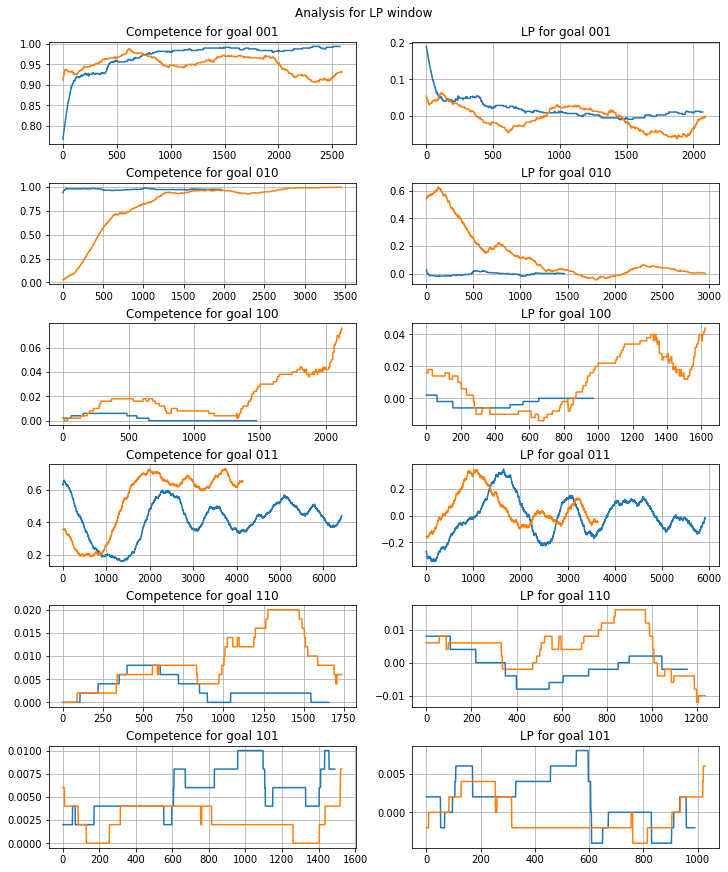

In [31]:
window_size = 500
fig, axs = plt.subplots(6, 2, figsize=(10, 12), constrained_layout=True)
for j, ax in enumerate(axs.flat):
    if j % 2 == 0:
        reward = list(reward_1.values())[int(j/2)]
        goal = list(reward_1.keys())[int(j/2)]
        competence = moving_average(reward, window_size)
        lp = [competence[i+window_size]-competence[i] for i in range(len(competence)-window_size)]
        ax.set_title(f'Competence for goal {goal}')
        ax.plot(competence)

        reward2 = list(reward_0.values())[int(j/2)]
        competence2 = moving_average(reward2, window_size)
        lp2 = [competence2[i+window_size]-competence2[i] for i in range(len(competence2)-window_size)]
        ax.plot(competence2)

        ax.grid()
    else:
        ax.set_title(f'LP for goal {goal}')
        ax.plot(lp)
        ax.plot(lp2)
        ax.grid()
plt.suptitle("Analysis for LP window")

Text(0.5, 0.98, 'Analysis for LP window')

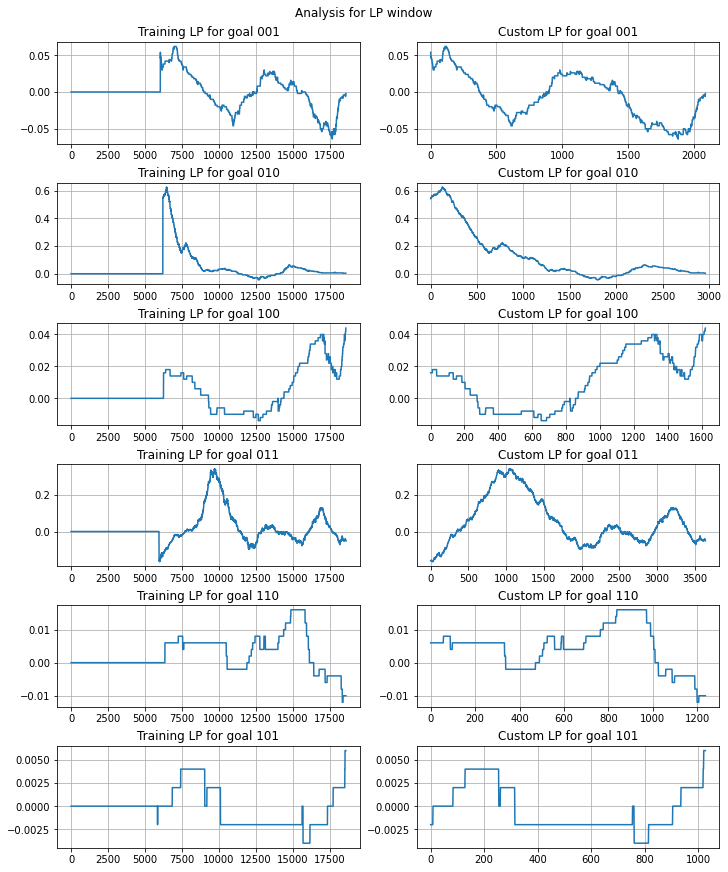

In [32]:
window_size = 500
fig, axs = plt.subplots(6, 2, figsize=(10, 12), constrained_layout=True)
for j, ax in enumerate(axs.flat):
    if j % 2 == 0:
        reward = list(reward_0.values())[int(j/2)]
        goal = list(reward_0.keys())[int(j/2)]
        competence = moving_average(reward, window_size)
        lp = [competence[i+window_size]-competence[i] for i in range(len(competence)-window_size)]
        ax.set_title(f'Training LP for goal {goal}')
        ax.plot(lp_0[goal])
        ax.grid()
    else:
        ax.set_title(f'Custom LP for goal {goal}')
        ax.plot(lp)
        ax.grid()
plt.suptitle("Analysis for LP window")

Text(0.5, 0.98, 'Training curves')

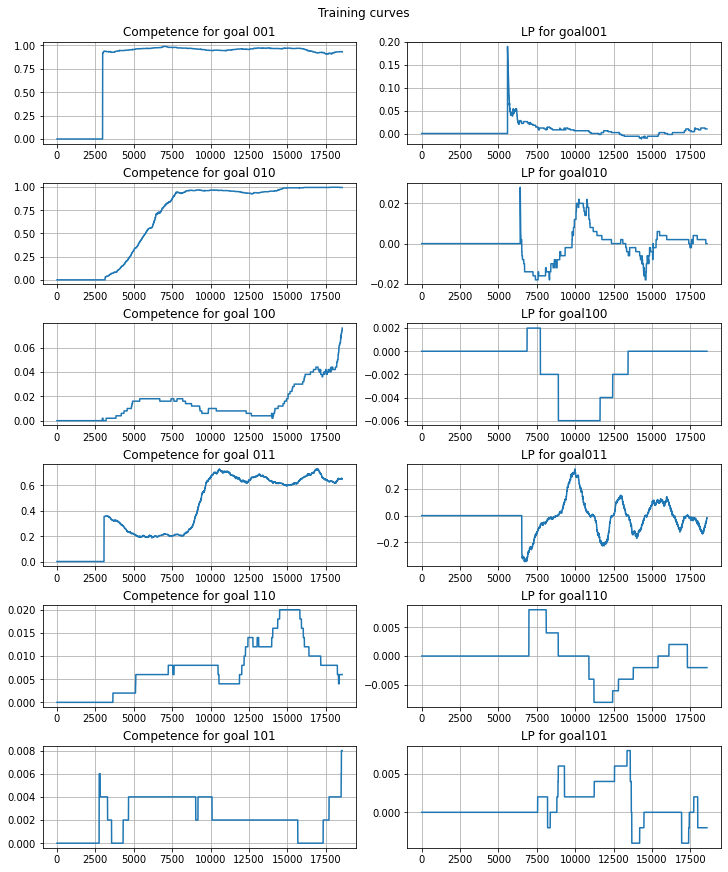

In [36]:
fig, axs = plt.subplots(6, 2, figsize=(10, 12), constrained_layout=True)
for j, ax in enumerate(axs.flat):
    if j % 2 == 0:
        competence = list(competence_0.values())[int(j/2)]
        lp = list(lp_1.values())[int(j/2)]
        goal = list(lp_1.keys())[int(j/2)]
        ax.set_title(f"Competence for goal {goal}")
        ax.plot(competence)
        ax.grid()
    else:
        ax.set_title(f"LP for goal{goal}")
        ax.plot(lp)
        ax.grid()
plt.suptitle("Training curves")


In [34]:
for g in goals:
    print(len(reward_0[g]))

3087
3960
2622
4641
2236
2027


In [35]:
for g in goals:
    print(len(reward_1[g]))

3070
2465
1973
6920
2156
1989


In [26]:
sum([len(g) for g in reward_0.values()])

25513